In [2]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np

nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

import json
import csv

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
files = [
  "latvenergo",
  "rimi",
  "maxima",
  "swedbank",
  "lmt",
  "tet",
  "lg",
  "tele2",
  "airbaltic",
  "olympic",
  "seb",
  "grindeks",
  "citadele",
  "bite",
  "drogas",
  "depo",
  "circlek",
  "lb",
  "optibet",
  "evolution",
];

In [16]:
def tweetsJsonToCsv():
    with open('../peopleTweets/allLabeledTweets.json', encoding='UTF-8') as json_file:
        jsondata = json.load(json_file)

    data_file = open('./tweets/raw/allLabeledTweets.csv', 'w', newline='', encoding='UTF-8')
    csv_writer = csv.writer(data_file)

    count = 0
    for data in jsondata:
        if count == 0:
            header = data.keys()
            csv_writer.writerow(header)
            count += 1
        csv_writer.writerow(data.values())

    data_file.close()

In [17]:
tweetsJsonToCsv()

In [149]:
# def readCsv(brand):
#     tweets = pd.read_csv('./tweets/raw/'+brand+'.csv')
#     tweets['brand'] = brand
#     tweets = tweets[tweets['label'].notna()]
#     return tweets

In [150]:
# latvenergoTweets = readCsv("latvenergo")
# rimiTweets = readCsv("rimi")
# maximaTweets = readCsv("maxima")
# swedbankTweets = readCsv("swedbank")
# lmtTweets = readCsv("lmt")
# tetTweets = readCsv("tet")
# lgTweets = readCsv("lg")
# tle2Tweets = readCsv("tele2")
# airBalticTweets = readCsv("airbaltic")
# olympicTweets = readCsv("olympic")
# sebTweets = readCsv("seb")
# grindeksTweets = readCsv("grindeks")
# citadeleTweets = readCsv("citadele")
# biteTweets = readCsv("bite")
# drogasTweets = readCsv("drogas")
# depoTweets = readCsv("depo")
# circlekTweets = readCsv("circlek")
# lbTweets = readCsv("lb")
# optibetTweets = readCsv("optibet")
# evolutionTweets = readCsv("evolution")


# allLabeledTweets = pd.concat([latvenergoTweets,
# rimiTweets,
# maximaTweets,
# swedbankTweets,
# lmtTweets,
# tetTweets,
# lgTweets,
# tle2Tweets,
# airBalticTweets,
# olympicTweets,
# sebTweets,
# grindeksTweets,
# citadeleTweets,
# biteTweets,
# drogasTweets,
# depoTweets,
# circlekTweets,
# lbTweets,
# optibetTweets,
# evolutionTweets
# ], axis=0,
#     join="outer",
#     ignore_index=True,
#     keys=None,
#     levels=None,
#     names=None,
#     verify_integrity=False,
#     copy=True,)

# allLabeledTweets['label'] = allLabeledTweets['label'].astype(int)
# allLabeledTweets.to_csv('./tweets/raw/allLabeledTweets.csv', index=False)

In [60]:
allLabeledTweets = pd.read_csv('./tweets/raw/allLabeledTweets.csv')
allLabeledTweets['label'] = allLabeledTweets['label'].fillna(0)
allLabeledTweets['label'] = allLabeledTweets['label'].astype(int)
allLabeledTweets['message'] = allLabeledTweets['message'].astype(str)
allLabeledTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,placeType,retweetedId,monitoringObjectId1,monitoringObjectId2,queryId,sentiment,retweetCount,label,clean_message,message_no_stopwords
0,Tiek vērtēti trīs potenciālie airBaltic invest...,1478404,925617390523732000,2017-11-01T08:55:57,lv,NaN,NaN,NaN,24855060,Dienas Bizness,...,NaN,NaN,389,389,NaN,0.0,0,0,t i e k v ē r t ē t i t r ī s p o t e n c i ā ...,vērtēti trīs potenciālie airbaltic investori U...
1,"Vakardien, vēlu vakarā, ar svinīgu pasākumu ti...",1486476,924948828318511100,2017-10-30T12:39:20,lv,NaN,NaN,NaN,44849531,RIGA I Airport,...,NaN,NaN,703,703,NaN,-1.0,0,0,v a k a r d i e n v ē l u v a k a r ā a r s v ...,vakardien vēlu vakarā svinīgu pasākumu atklāts...
2,"Es ļoti ceru,ka potenciālie Air Baltic investo...",1488297,925794560420311000,2017-11-01T20:39:58,lv,NaN,NaN,NaN,218804015,Artis Pabriks,...,NaN,NaN,576,3,NaN,-1.0,9,2,e s ļ o t i c e r u k a p o t e n c i ā l i e ...,es ļoti ceruka potenciālie air baltic investor...
3,Ar kritisko domāšanu gan joprojām bēdīgi. Piln...,1489818,925045141018218500,2017-10-30T19:02:02,lv,NaN,NaN,NaN,21071644,Andris Rubīns,...,NaN,NaN,319,319,NaN,-1.0,3,2,a r k r i t i s k o d o m ā š a n u g a n j o ...,kritisko domāšanu joprojām bēdīgi pilns facebo...
4,Latvijas lidsabiedrība airBaltic sadarbībā ar ...,1490250,925006964135952400,2017-10-30T16:30:20,lv,NaN,NaN,NaN,131562098,Latviesi.com,...,NaN,NaN,453,453,NaN,0.0,0,0,l a t v i j a s l i d s a b i e d r ī b a a i ...,latvijas lidsabiedrība airbaltic sadarbībā apv...


In [61]:
allLabeledTweets['label'].value_counts()

0    253
2    136
1     87
Name: label, dtype: int64

In [62]:
posessivePronouns = "'s"
newLine ="\\n"
urls = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
numbers = ' \d+((\.|\-)\d+)? '
mentions = '\B\@([\w\-]+)'
hashtag = '#'
punctuationAfterWord = '(?<=\s)|(?<=^)|(?<=\b)(?:[-\'.%$#&,\/:!-?`“–&]\b|\b[-\'.%$#&,\/:!-?`“–&])+(?=\s|$|\b)'
punctuation = '[(,|.|!|\-|\–|\`|?|:|“|”|►|;|\'|%|&|@)]?'
smile = ':\)|=\)'
frown = ':\(|=\('
whitespacesOrSlash = '\s+|\/'
leadTrailWhitespace = '^\s+|\s+?$'

allLabeledTweets['clean_message'] = allLabeledTweets['message'].str.lower()
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(posessivePronouns,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(newLine,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(urls,' URL ',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(mentions,' MENTION ',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(punctuation,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(numbers,' NMBR ',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(hashtag,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(smile,'SMILE',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(frown,'FROWN',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(punctuationAfterWord,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(whitespacesOrSlash,' ',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(leadTrailWhitespace,'',regex=True)

In [63]:
allLabeledTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,placeType,retweetedId,monitoringObjectId1,monitoringObjectId2,queryId,sentiment,retweetCount,label,clean_message,message_no_stopwords
0,Tiek vērtēti trīs potenciālie airBaltic invest...,1478404,925617390523732000,2017-11-01T08:55:57,lv,NaN,NaN,NaN,24855060,Dienas Bizness,...,NaN,NaN,389,389,NaN,0.0,0,0,tiek vērtēti trīs potenciālie airbaltic invest...,vērtēti trīs potenciālie airbaltic investori U...
1,"Vakardien, vēlu vakarā, ar svinīgu pasākumu ti...",1486476,924948828318511100,2017-10-30T12:39:20,lv,NaN,NaN,NaN,44849531,RIGA I Airport,...,NaN,NaN,703,703,NaN,-1.0,0,0,vakardien vēlu vakarā ar svinīgu pasākumu tika...,vakardien vēlu vakarā svinīgu pasākumu atklāts...
2,"Es ļoti ceru,ka potenciālie Air Baltic investo...",1488297,925794560420311000,2017-11-01T20:39:58,lv,NaN,NaN,NaN,218804015,Artis Pabriks,...,NaN,NaN,576,3,NaN,-1.0,9,2,es ļoti ceruka potenciālie air baltic investor...,es ļoti ceruka potenciālie air baltic investor...
3,Ar kritisko domāšanu gan joprojām bēdīgi. Piln...,1489818,925045141018218500,2017-10-30T19:02:02,lv,NaN,NaN,NaN,21071644,Andris Rubīns,...,NaN,NaN,319,319,NaN,-1.0,3,2,ar kritisko domāšanu gan joprojām bēdīgi pilns...,kritisko domāšanu joprojām bēdīgi pilns facebo...
4,Latvijas lidsabiedrība airBaltic sadarbībā ar ...,1490250,925006964135952400,2017-10-30T16:30:20,lv,NaN,NaN,NaN,131562098,Latviesi.com,...,NaN,NaN,453,453,NaN,0.0,0,0,latvijas lidsabiedrība airbaltic sadarbībā ar ...,latvijas lidsabiedrība airbaltic sadarbībā apv...


In [64]:
allLabeledTweets.to_csv('./tweets/raw/allLabeledTweets.csv', index=False)

In [65]:
words = word_tokenize(allLabeledTweets.loc[41]['clean_message'])
print(words)

['ļaudis', 'sabiedēja', 'ka', 'ļaunais', 'MENTION', 'pie', 'iekāpšanas', 'kratot', 'un', 'sverot', 'pasažierus', 'bagāžas', 'blēņas', 'kā', 'allaž', 'viss', 'absolūti', 'korekti', 'un', 'cieņpilni', 'lieliska', 'lidmašīna', 'glītas', 'un', 'izglītotas', 'stjuartes', 'URL']


In [66]:
stopwords_lv = ["ārpus", "šaipus", "aiz", "ap", "apakš", "apakšpus", "arī", "ar", "ar", "augšpus", "būšu", "būs", "būsi", "būsiet", "būsim", "būt", "bet", "bez", "bijām", "bijāt", "bija", "biji", "biju", "caur", "dēļ", "diemžēl", "diezin", "droši", "esam", "esat", "esi", "esmu", "gan", "gar", "iekām", "iekāms", "iekš", "iekšpus", "iekam", "iekams", "ik", "ir", "it", "itin", "iz", "jā", "ja", "jau", "jebšu", "jeb", "jel", "jo", "kā", "kļūšu", "kļūs", "kļūsi", "kļūsiet", "kļūsim", "kļūst", "kļūstam	kļūstat", "kļūsti", "kļūstu", "kļūt", "kļuvām", "kļuvāt", "kļuva", "kļuvi", "kļuvu", "ka", "kamēr", "kaut", "kolīdz", "kopš", "līdz", "līdzko", "labad", "lai", "lejpus", "nē", "ne", "nebūt", "nedz", "nekā", "nevis", "nezin", "no", "nu", "otrpus", "pār", "pēc", "pa", "par", "pat", "pie", "pirms", "pret", "priekš", "starp", "tā", "tādēļ", "tālab", "tāpēc", "taču", "tad", "tak", "tapāt", "tapšu", "tapi", "taps", "tapsi", "tapsiet", "tapsim", "tapt", "te", "tiec", "tiek", "tiekam", "tiekat", "tieku	tikām", "tikāt", "tikšu", "tik", "tika", "tikai", "tiki", "tikko", "tiklīdz", "tiklab", "tiks", "tiksiet", "tiksim", "tikt", "tiku", "tikvien", "tomēr", "topat", "turpretī", "turpretim", "un", "uz", "vai", "varēšu", "varējām", "varējāt", "varēja", "varēji", "varēju", "varēs", "varēsi", "varēsiet", "varēsim", "varēt", "var", "varat", "viņpus", "vien", "vien", "virs", "virspus", "vis", "zem"]
message_no_stopwords=[]

for message in allLabeledTweets.clean_message:
    text_tokens = word_tokenize(message)
    tokens_without_stop_words = [word for word in text_tokens if not word in stopwords_lv]
    message_no_stopwords.append((" ").join(tokens_without_stop_words))

allLabeledTweets['message_no_stopwords'] = message_no_stopwords

In [67]:
print(allLabeledTweets.loc[345]['message'])
print(allLabeledTweets.loc[345]['clean_message'])
print(allLabeledTweets.loc[345]['message_no_stopwords'])
print(allLabeledTweets.loc[345]['label'])
allLabeledTweets.to_csv('./tweets/raw/allLabeledTweets.csv', index=False)

Tiešraide jau pēc 15 minūtēm!

HK Prizma - HK Zemgale/LU 
Optibet hokeja līga

Skaties spēli šeit - https://t.co/RvtA1bPWF7 https://t.co/21nbpZtHd9
tiešraide jau pēc NMBR minūtēmhk prizma hk zemgale lu optibet hokeja līgaskaties spēli šeit URL URL
tiešraide NMBR minūtēmhk prizma hk zemgale lu optibet hokeja līgaskaties spēli šeit URL URL
0


In [68]:
def getWordFrequency(processedTweetOutputFile):
    tweets = pd.read_csv(processedTweetOutputFile)

    allPostsConcat = ''
    for tweet in tweets.message_no_stopwords:
        if(type(tweet)==str):
            allPostsConcat+=' '+ tweet

    # create bag-of-words
    all_words = []

    words = word_tokenize(allPostsConcat)
    for word in words:
        if word!='``':
            all_words.append(word)

    all_words = nltk.FreqDist(all_words)
    
    return all_words

In [69]:
def getWordFrequencyWithoutBrands(processedTweetOutputFile):
    tweets = pd.read_csv(processedTweetOutputFile)

    allPostsConcat = ''
    for tweet in tweets.message_no_stopwords:
        if(type(tweet)==str):
            allPostsConcat+=' '+ tweet

    # create bag-of-words
    all_words = []

    words = word_tokenize(allPostsConcat)
    words = [word for word in words if not word in files]
    for word in words:
        if word!='``':
            all_words.append(word)

    all_words = nltk.FreqDist(all_words)
    
    return all_words

In [70]:
freqWords = getWordFrequency('./tweets/raw/allLabeledTweets.csv')

# print the total number of words and the 100 most common words
print('Number of words: {}'.format(len(freqWords)))
print('Most common words: {}'.format(freqWords.most_common(100)))

word_features = list(freqWords.keys())[:1500]

# save word_features to file
filename = './data/wordFeatures.data'
pickle.dump(word_features, open(filename, 'wb'))

Number of words: 3869
Most common words: [('URL', 509), ('MENTION', 328), ('NMBR', 196), ('latvenergo', 59), ('lmt', 45), ('bite', 43), ('kas', 41), ('kopā', 40), ('latvijas', 39), ('vēl', 39), ('nav', 34), ('lieliskamūzika', 34), ('rimi', 33), ('airbaltic', 28), ('to', 28), ('optibet', 28), ('lhf', 25), ('kopāspēks', 24), ('tiešraide', 24), ('spēli', 24), ('maxima', 23), ('es', 22), ('tas', 22), ('šeit', 22), ('the', 20), ('lielfans', 19), ('tagad', 18), ('man', 17), ('šodien', 17), ('hokeja', 16), ('ļoti', 15), ('rīgas', 15), ('mūsu', 15), ('līgaskaties', 15), ('kad', 14), ('eiro', 14), ('gada', 13), ('izlase', 12), ('oik', 12), ('vairāk', 11), ('dienasbizness', 11), ('ielā', 11), ('tv', 11), ('kur', 10), ('darbinieku', 10), ('minūtēm', 10), ('latvija', 10), ('ko', 10), ('vietas', 9), ('varētu', 9), ('kāpēc', 9), ('kāds', 9), ('valsts', 9), ('lauvassirds', 9), ('paldies', 9), ('rīgā', 9), ('telpu', 9), ('depo', 9), ('darbu', 9), ('jaunajā', 9), ('nevar', 8), ('visu', 8), ('dblv', 8),

In [71]:
freqWordsWithoutBrands = getWordFrequencyWithoutBrands('./tweets/raw/allLabeledTweets.csv')

# print the total number of words and the 100 most common words
print('Number of words: {}'.format(len(freqWordsWithoutBrands)))
print('Most common words: {}'.format(freqWordsWithoutBrands.most_common(100)))

word_features_without_brands = list(freqWordsWithoutBrands.keys())[:1500]

# save word_features to file
filename = './data/wordFeaturesWithoutBrands.data'
pickle.dump(word_features_without_brands, open(filename, 'wb'))

Number of words: 3851
Most common words: [('URL', 509), ('MENTION', 328), ('NMBR', 196), ('kas', 41), ('kopā', 40), ('latvijas', 39), ('vēl', 39), ('nav', 34), ('lieliskamūzika', 34), ('to', 28), ('lhf', 25), ('kopāspēks', 24), ('tiešraide', 24), ('spēli', 24), ('es', 22), ('tas', 22), ('šeit', 22), ('the', 20), ('lielfans', 19), ('tagad', 18), ('man', 17), ('šodien', 17), ('hokeja', 16), ('ļoti', 15), ('rīgas', 15), ('mūsu', 15), ('līgaskaties', 15), ('kad', 14), ('eiro', 14), ('gada', 13), ('izlase', 12), ('oik', 12), ('vairāk', 11), ('dienasbizness', 11), ('ielā', 11), ('tv', 11), ('kur', 10), ('darbinieku', 10), ('minūtēm', 10), ('latvija', 10), ('ko', 10), ('vietas', 9), ('varētu', 9), ('kāpēc', 9), ('kāds', 9), ('valsts', 9), ('lauvassirds', 9), ('paldies', 9), ('rīgā', 9), ('telpu', 9), ('darbu', 9), ('jaunajā', 9), ('nevar', 8), ('visu', 8), ('dblv', 8), ('bankas', 8), ('elektrības', 8), ('zālē', 8), ('neko', 7), ('kāda', 7), ('interesanti', 7), ('iespējams', 7), ('tiešām', 7),

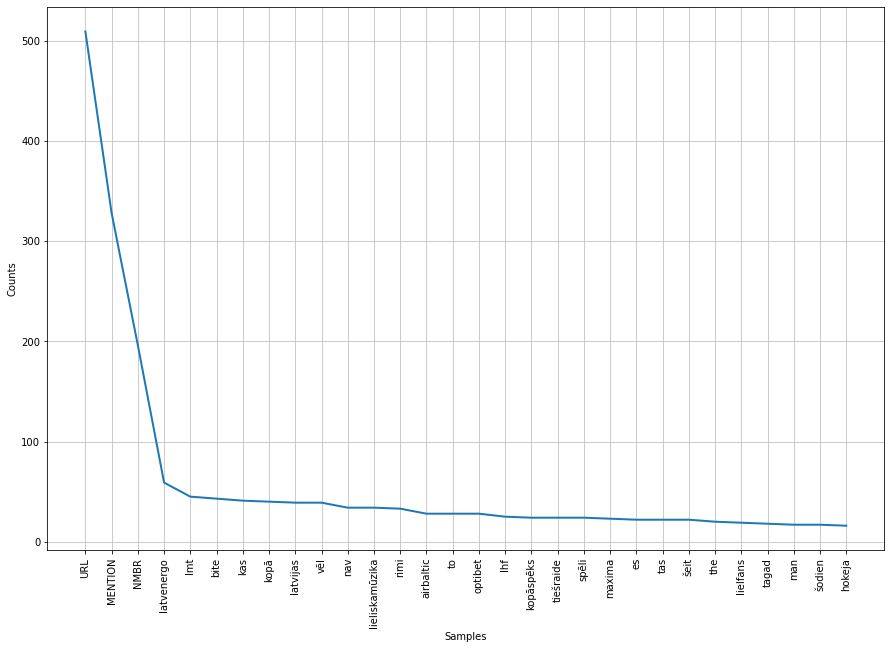

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
freqWords.plot(30,cumulative=False)
plt.show()

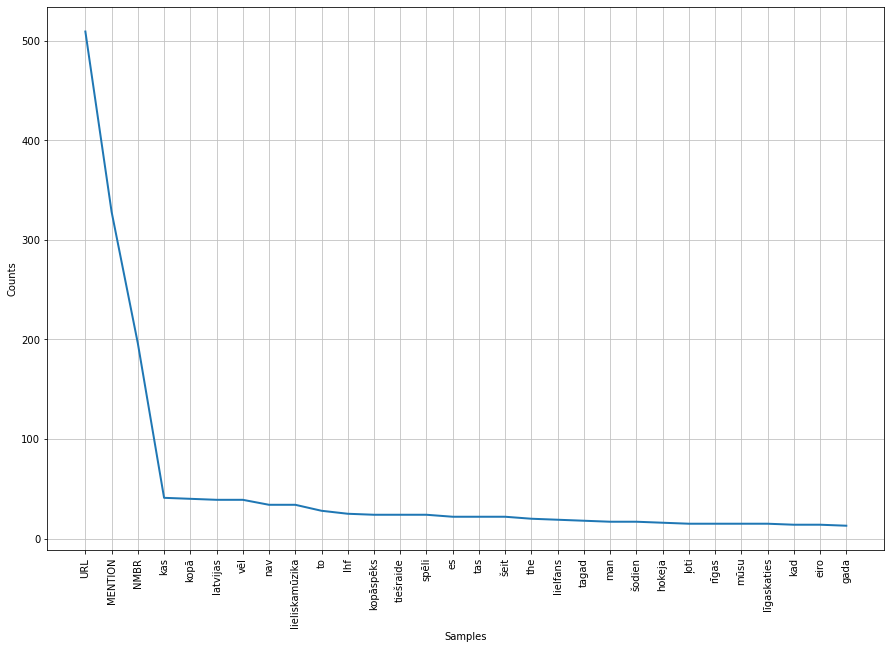

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
freqWordsWithoutBrands.plot(30,cumulative=False)
plt.show()

# Train

In [74]:
# function to find features in every post
def find_features(post):
    words = word_tokenize(post)
    features = {}
    for word in word_features:
        features[word] = (word in words)
    return features

In [75]:
tweets_all = list(zip(allLabeledTweets.loc[:,"message_no_stopwords"].values,allLabeledTweets.loc[:,"label"].values))

featuresets = [(find_features(text), label) for (text, label) in tweets_all]

from sklearn import model_selection

# split the data into training and testing datasets
seed = 1
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

print(len(allLabeledTweets))
print(len(training))
print(len(testing))

# save testing and training data to file
filename = './data/testing_tweets.data'
pickle.dump(testing, open(filename, 'wb'))

filename = './data/training_tweets.data'
pickle.dump(training, open(filename, 'wb'))

476
357
119


In [76]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=1000),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 53.78151260504202
Decision Tree Accuracy: 65.54621848739495
Random Forest Accuracy: 63.02521008403361
Logistic Regression Accuracy: 65.54621848739495
SGD Classifier Accuracy: 57.98319327731093
Naive Bayes Accuracy: 63.86554621848739
SVM Linear Accuracy: 61.34453781512605


In [77]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 61.34453781512605


In [78]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction))

              precision    recall  f1-score   support

           0       0.66      0.89      0.75        64
           1       0.38      0.25      0.30        20
           2       0.68      0.37      0.48        35

    accuracy                           0.63       119
   macro avg       0.57      0.50      0.51       119
weighted avg       0.62      0.63      0.60       119



,0,1,2
0,57,3,4
1,13,5,2
2,17,5,13


In [79]:
# save the model to disk
filename = './models/model_votingClassifier_with_brands.sav'
pickle.dump(nltk_ensemble, open(filename, 'wb'))

In [80]:
# function to find features in every post
def find_features_no_brands(post):
    words = word_tokenize(post)
    features = {}
    for word in word_features_without_brands:
        features[word] = (word in words)
    return features

tweets_all = list(zip(allLabeledTweets.loc[:,"message_no_stopwords"].values,allLabeledTweets.loc[:,"label"].values))
featuresets = [(find_features_no_brands(text), label) for (text, label) in tweets_all]

from sklearn import model_selection

# split the data into training and testing datasets
seed = 1
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

print(len(allLabeledTweets))
print(len(training))
print(len(testing))

# save testing and training data to file
filename = './data/testing_tweets_no_brands.data'
pickle.dump(testing, open(filename, 'wb'))

filename = './data/training_tweets_no_brands.data'
pickle.dump(training, open(filename, 'wb'))

476
357
119


In [81]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=1000),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 52.94117647058824
Decision Tree Accuracy: 58.82352941176471
Random Forest Accuracy: 61.34453781512605
Logistic Regression Accuracy: 65.54621848739495
SGD Classifier Accuracy: 62.18487394957983
Naive Bayes Accuracy: 62.18487394957983
SVM Linear Accuracy: 62.18487394957983


In [82]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 62.18487394957983


In [83]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74        64
           1       0.38      0.15      0.21        20
           2       0.57      0.34      0.43        35

    accuracy                           0.61       119
   macro avg       0.53      0.46      0.46       119
weighted avg       0.57      0.61      0.56       119



,0,1,2
0,57,0,7
1,15,3,2
2,18,5,12
